<a href="https://colab.research.google.com/github/fiftybucks101/Decision_Tree/blob/main/Diabetis_Descision_Tree_Hyperparameter_Tuining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Basic Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   int64  
 2   BloodPressure             1000 non-null   int64  
 3   SkinThickness             1000 non-null   int64  
 4   Insulin                   1000 non-null   int64  
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   int64  
 8   Outcome                   1000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 70.4 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,4.051000,125.21600,69.072000,20.755000,83.086000,32.664772,0.494090,33.830000,0.50000
std,3.325576,32.27772,20.465328,16.008599,117.255326,7.563614,0.322158,11.268189,0.50025
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.00000
25%,1.000000,102.00000,64.000000,0.000000,0.000000,28.275000,0.258750,25.000000,0.00000
50%,3.000000,122.00000,72.000000,24.000000,23.000000,32.800000,0.408500,30.000000,0.50000
75%,6.000000,146.00000,80.000000,33.000000,133.500000,36.900000,0.658500,41.000000,1.00000
max,17.000000,199.00000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.00000


In [5]:
# check for null values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# drop duplicated values if present

df.drop_duplicates(inplace=True)

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: >]


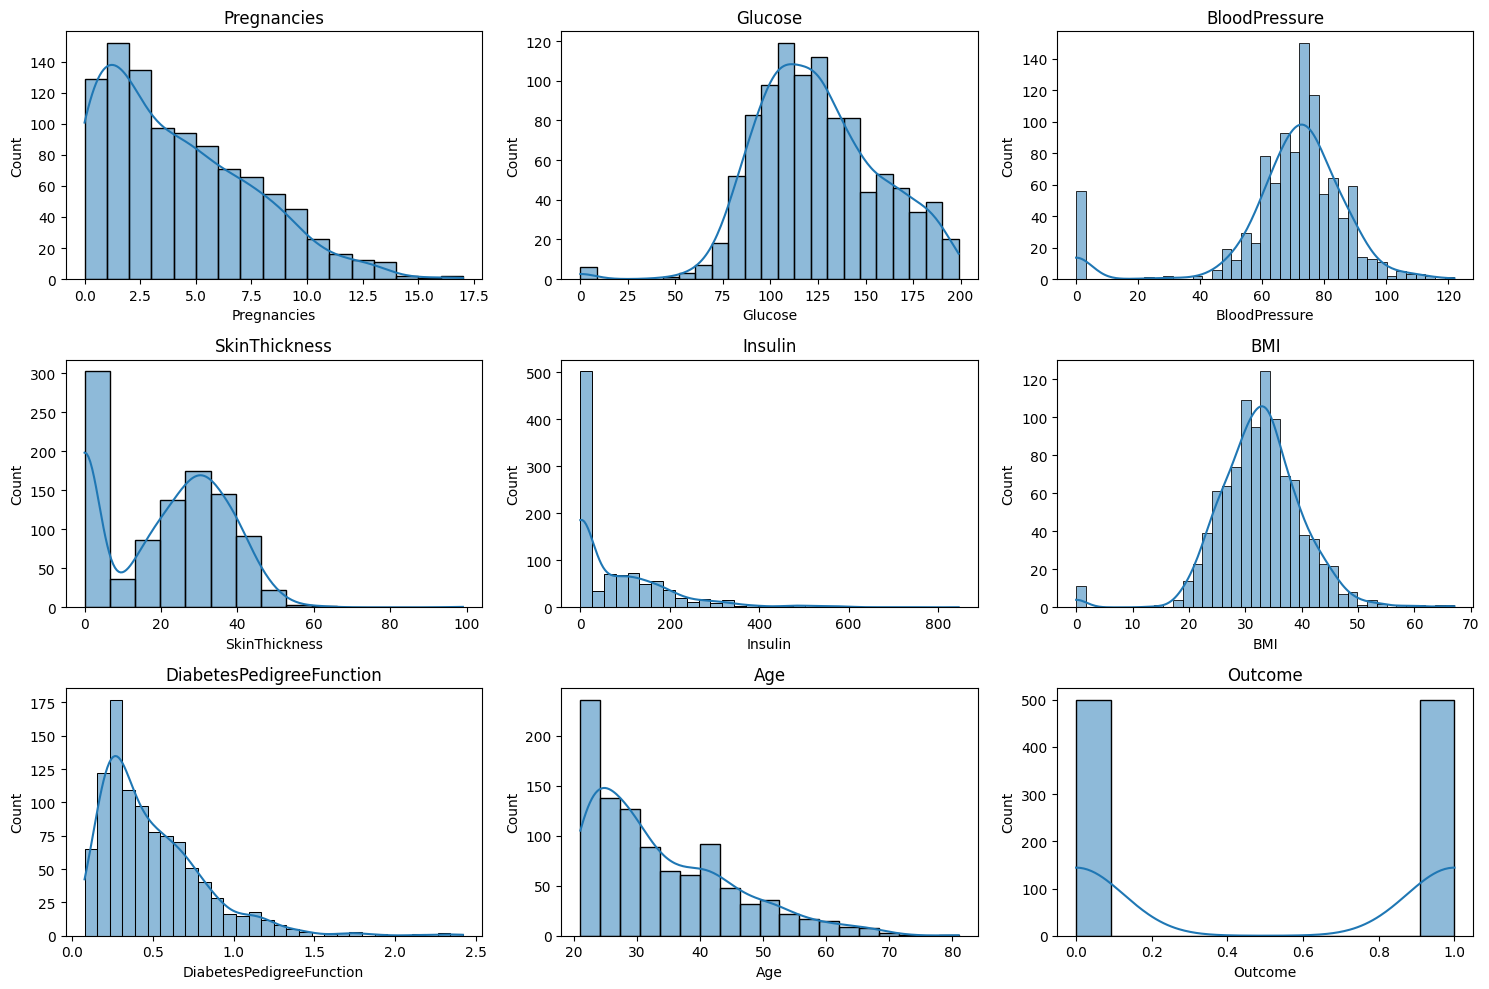

In [7]:
# visualization of the distribution of dataset

no_columns = len(df.columns)

fig, axs = plt.subplots(3,3,figsize=(15,10))

axis = axs.ravel()
print(axis)

for i, column in enumerate(df.columns):
  sns.histplot(x=df[column],kde=True,ax=axis[i])
  axis[i].set_title(f"{column}")

plt.tight_layout()
plt.show()

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: >]


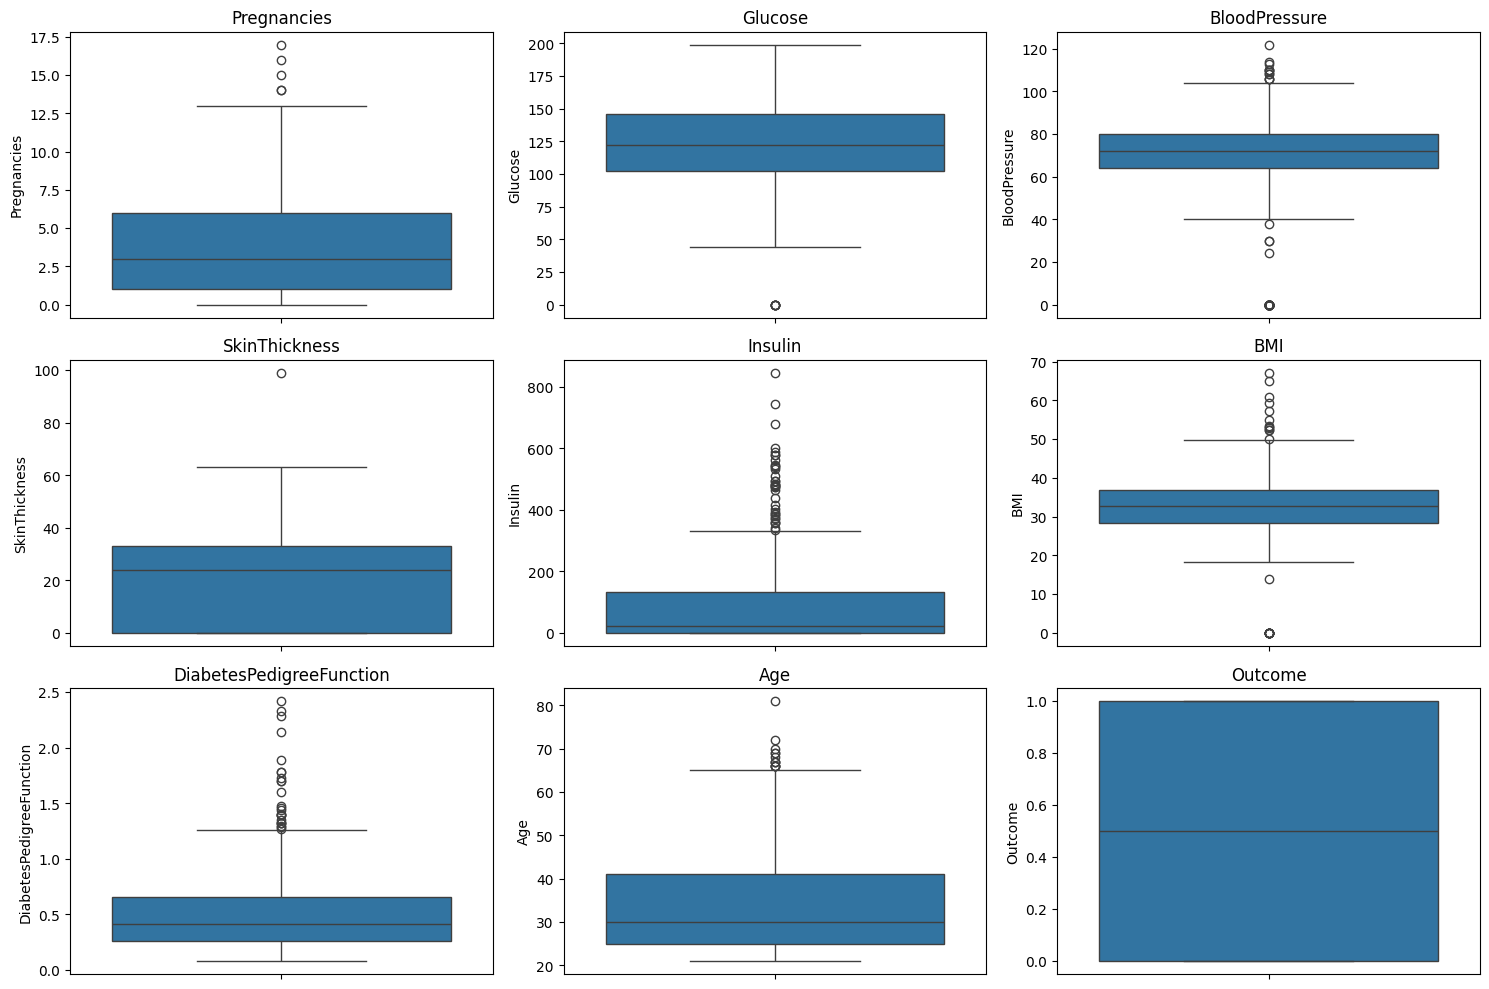

In [8]:
# see if outliers are present

fig, axs = plt.subplots(3,3,figsize=(15,10))

axis = axs.ravel()
print(axis)

for i, column in enumerate(df.columns):
  sns.boxplot(y=df[column],ax=axis[i])
  axis[i].set_title(f"{column}")

plt.tight_layout()
plt.show()

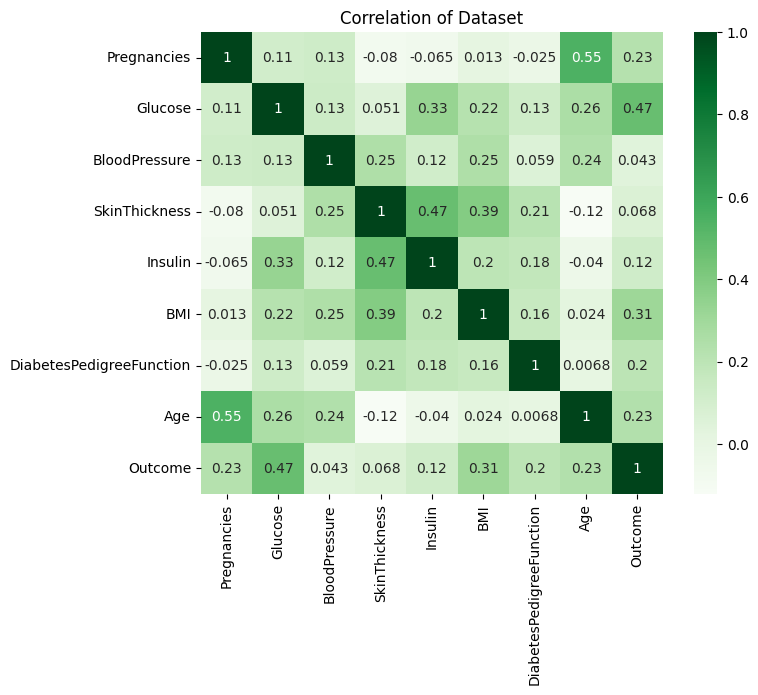

In [9]:
# correlation visualization with heatmap

plt.figure(figsize=(8,6))
corr = df.corr()

sns.heatmap(corr,annot=True,square=True,cmap='Greens')
plt.title('Correlation of Dataset')
plt.show()

**Pair plot shows balanced distribution of Target variable with respect to each column**

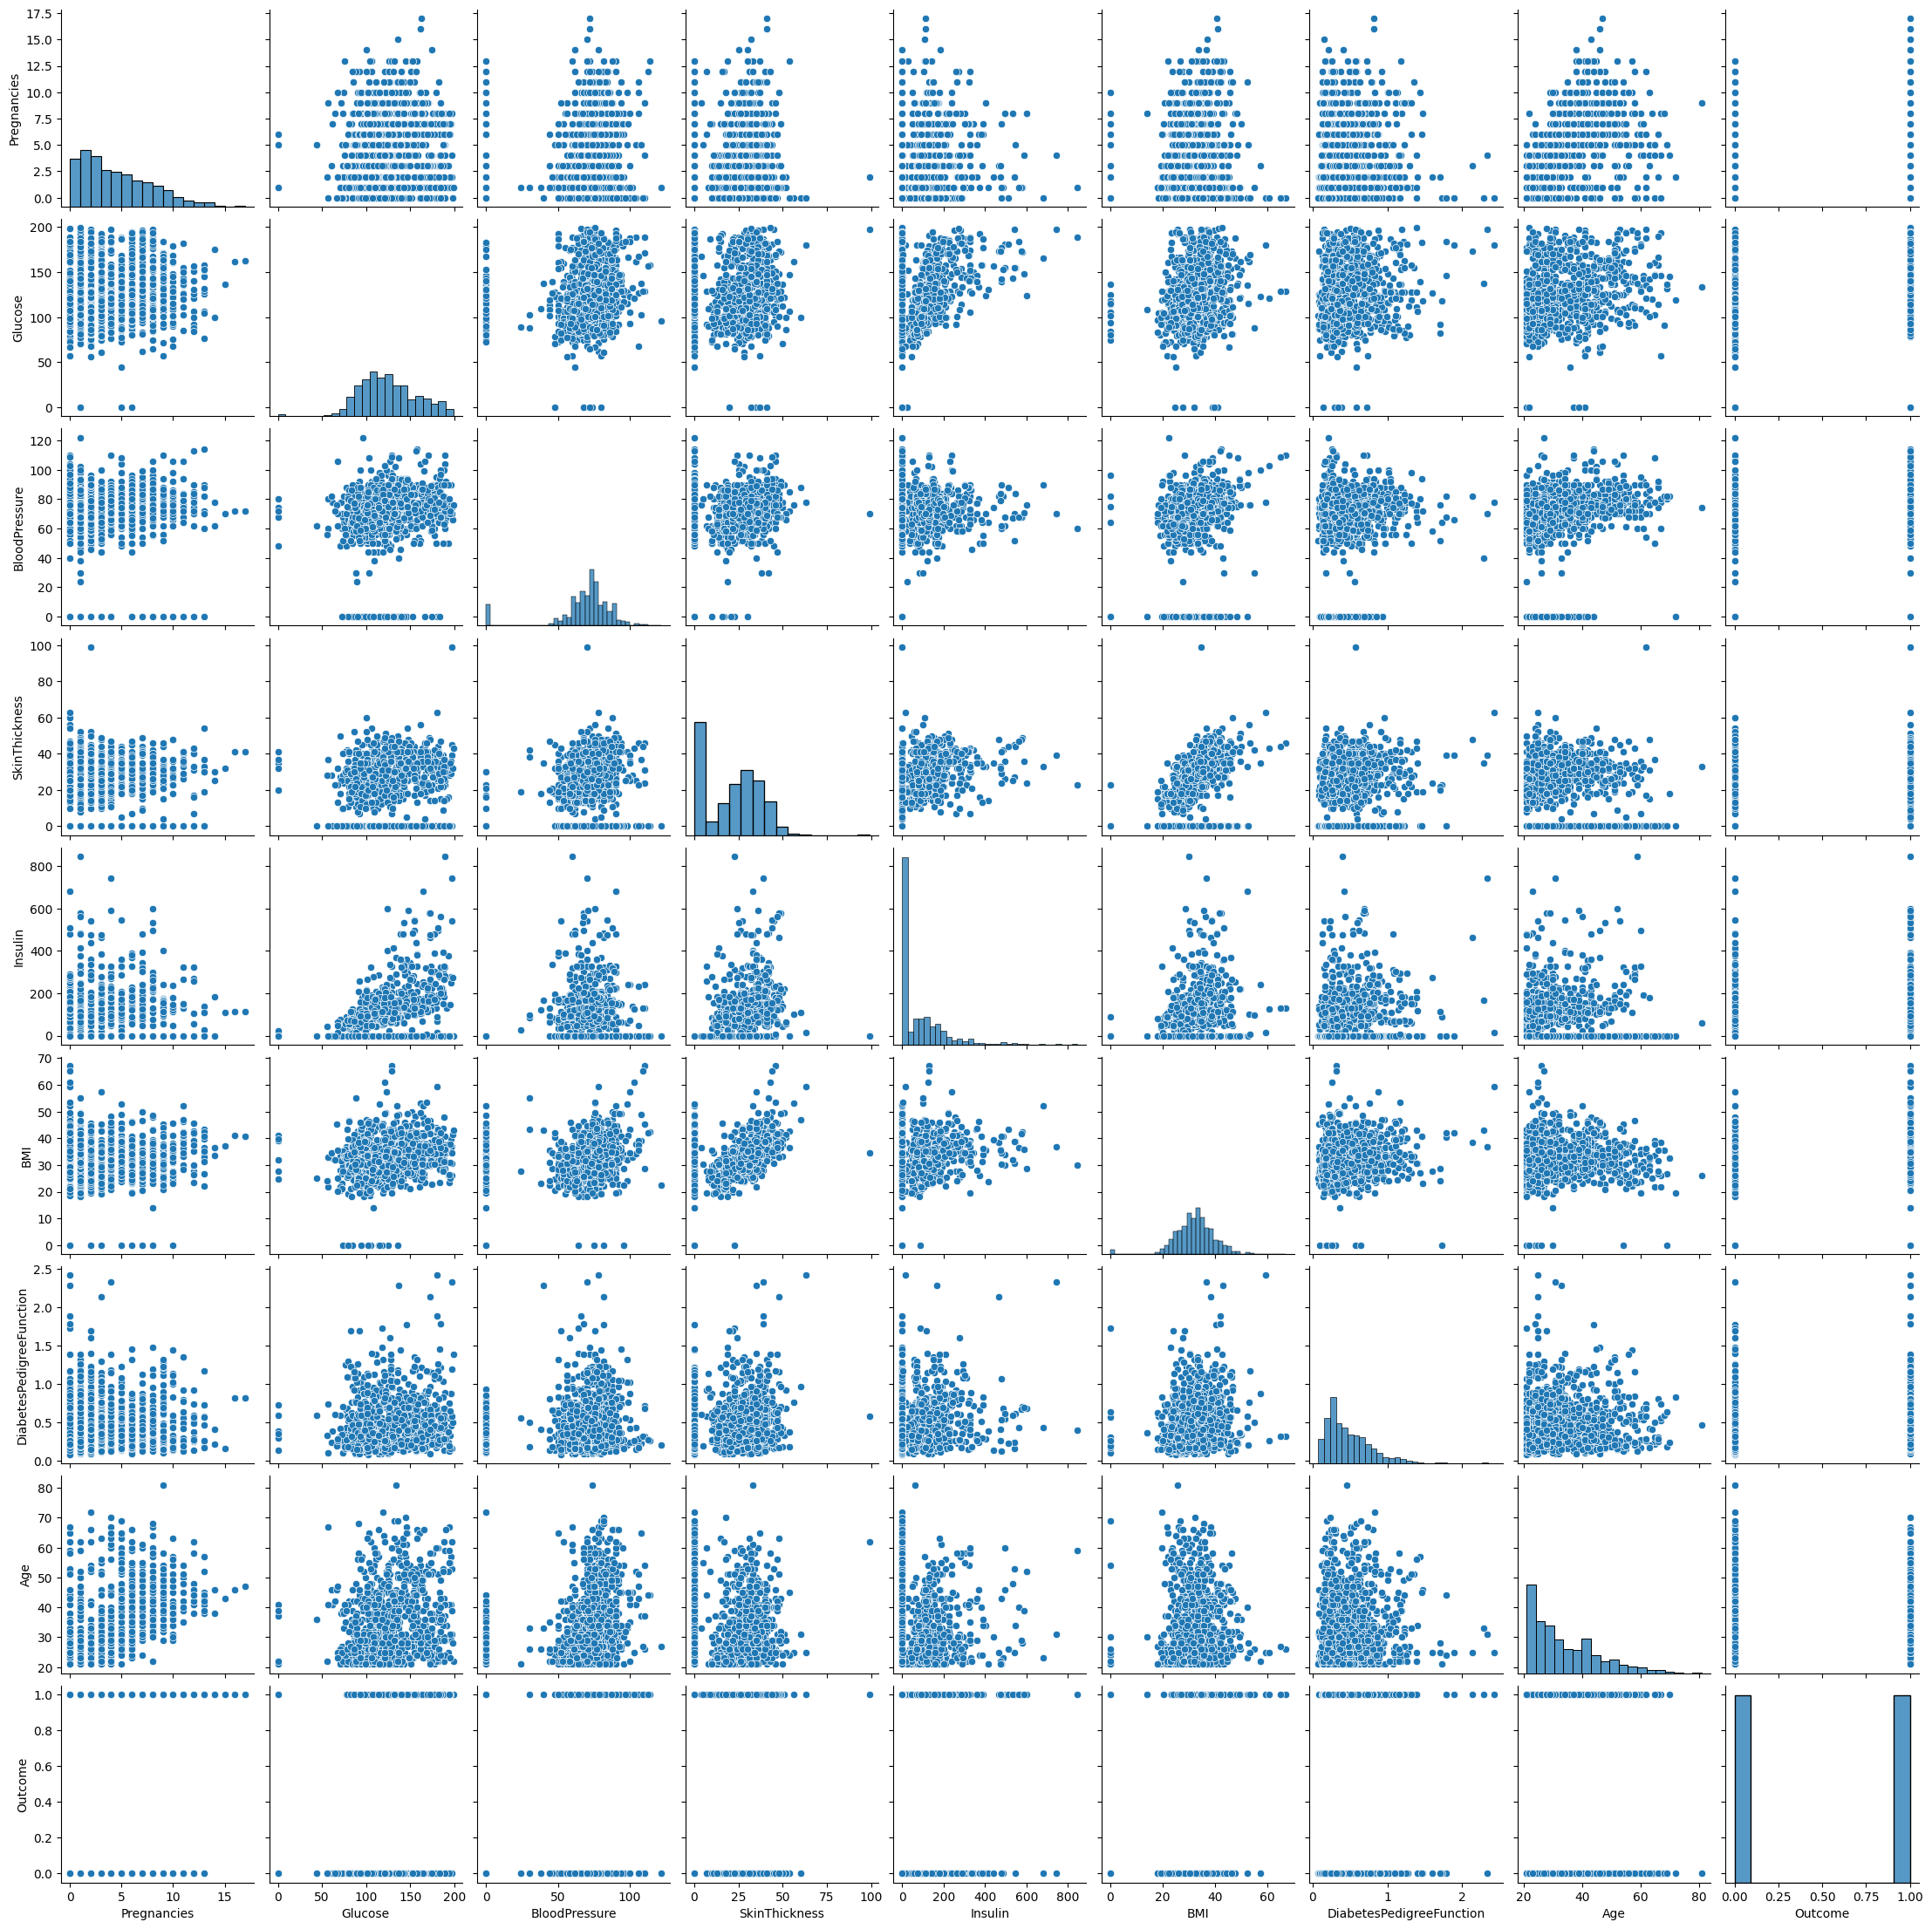

In [10]:
# pair plot visualization

sns.pairplot(df)

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# Seperate Dependent and Independent Variable

X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [13]:
print(X.shape)
print(y.shape)

(1000, 8)
(1000,)


In [14]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.23)


In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(770, 8)
(230, 8)
(770,)
(230,)


In [16]:
# Scaling featues with standard scaler

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [17]:
X_train[0:2]

array([[-0.30922731, -0.27103905,  0.22383642, -0.38216456,  0.18474787,
        -0.90060821, -1.18607691, -0.87584648],
       [-1.22150711,  0.10075442, -0.07686851, -0.13368095,  0.82654225,
        -0.32299442,  2.65448497, -0.7865454 ]])

In [18]:
X_test[0:2]

array([[-0.30922731,  1.40203157, -0.27733847,  0.92237438,  1.21161888,
         0.22711395, -0.43823062, -0.34003997],
       [ 1.51533229,  1.24711762,  0.07348395, -1.3139781 , -0.71376426,
         0.37807374, -0.04550998,  0.01716436]])

In [19]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [20]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred_test = clf.predict(X_test)

In [22]:
y_pred_train = clf.predict(X_train)

**Accuracy score shows overfitting of data since test accuracy is way less than train accuracy**

In [23]:
from sklearn.metrics import accuracy_score

print('Training Accuracy: ', accuracy_score(y_train,y_pred_train))
print('Test Accuracy: ', accuracy_score(y_test,y_pred_test))

Training Accuracy:  1.0
Test Accuracy:  0.782608695652174


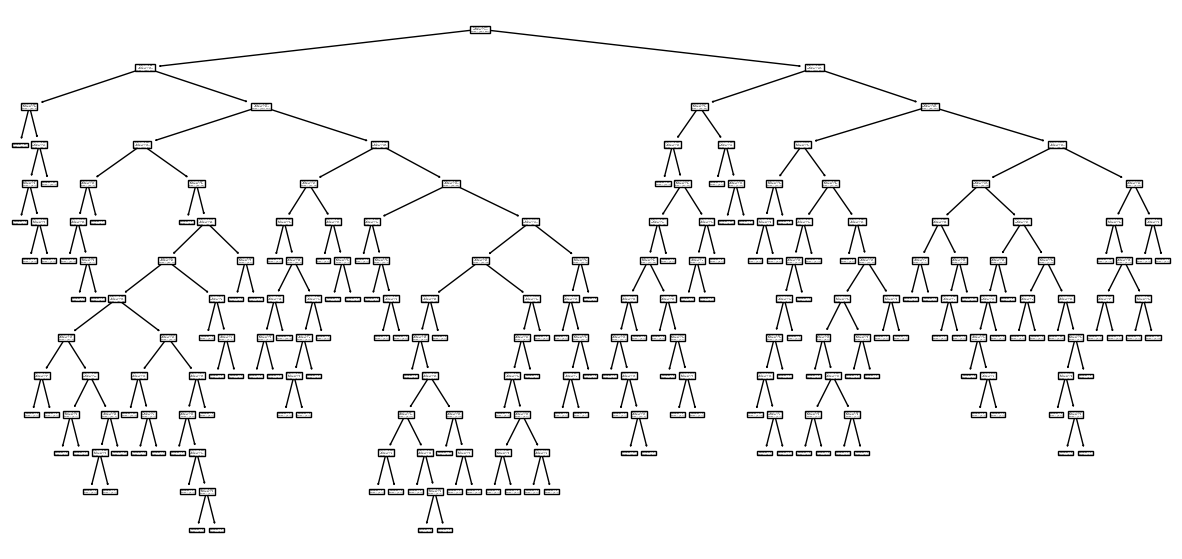

In [24]:
# let's visualize descision tree

from sklearn.tree import plot_tree

plt.figure(figsize=(15,7))
plot_tree(clf)
plt.show()


As we can see tree size is much bigger, we scale it down with hyperparameter tuining to reduce overfitting

In [25]:
# dictionary of paramater for gridsearchcv

params_dict = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,None]
    }

In [26]:
# Using GridSearchCV for hyperparameter tuining

from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(estimator=clf,param_grid=params_dict,cv=10)


In [27]:
gsc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [28]:
gsc.best_params_

{'criterion': 'entropy', 'max_depth': None}

In [29]:
gsc.best_score_

0.7311688311688312

In [30]:
y_pred = gsc.predict(X_test)
print('Test Accuracy: ',accuracy_score(y_test,y_pred))

Test Accuracy:  0.7695652173913043


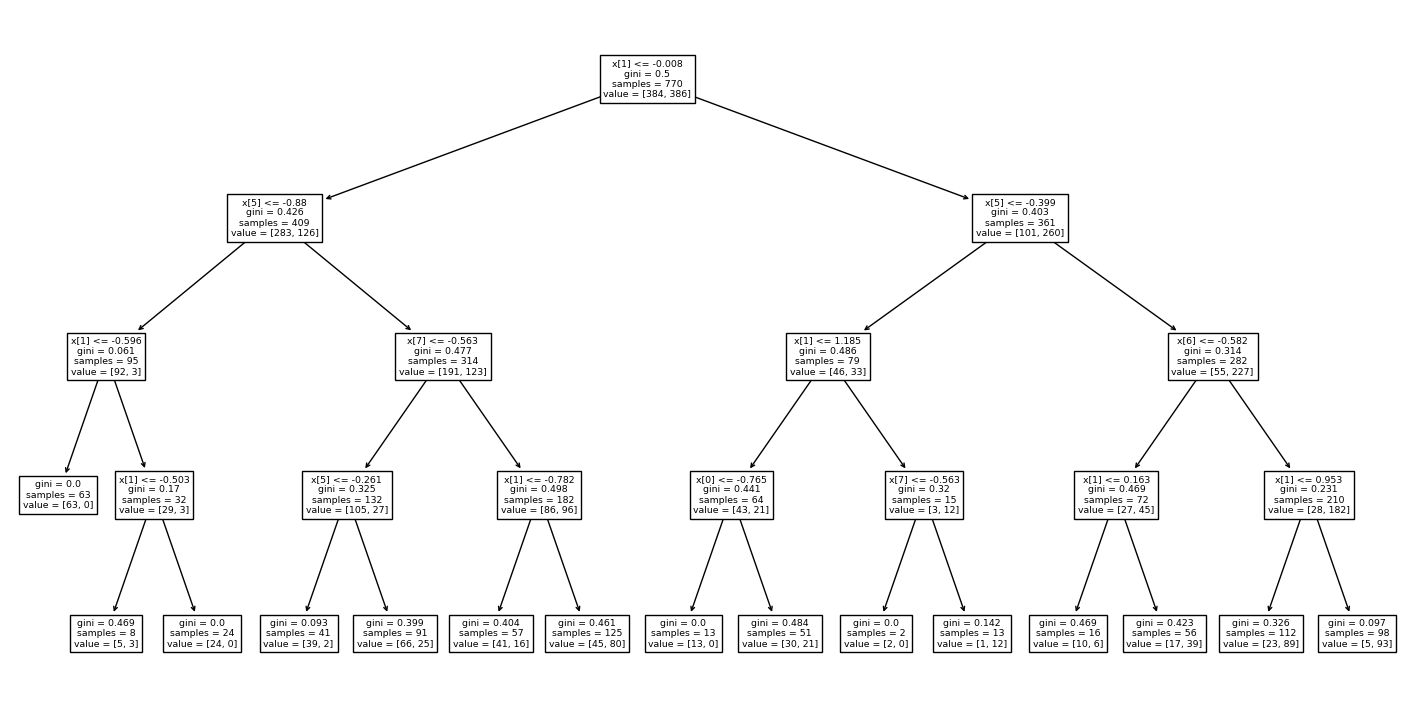

In [31]:
# visualtization of tree with our best params

plt.figure(figsize=(18,9))
clf = DecisionTreeClassifier(criterion='gini', max_depth=4)
clf.fit(X_train,y_train)
plot_tree(clf)
plt.show()


In [32]:
# addition of more hyperparameter to observe the results

params_dict = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,None],
    'splitter':['random','best']
    }

In [33]:
# Using GridSearchCV for hyperparameter tuining

from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(estimator=clf,param_grid=params_dict,cv=10)

In [34]:
gsc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'splitter': ['random', 'best']})

In [35]:
gsc.best_params_

{'criterion': 'entropy', 'max_depth': None, 'splitter': 'random'}

In [36]:
gsc.best_score_

0.7324675324675326

*Wow, our training accuracy slightly increased*

In [37]:
y_pred = gsc.predict(X_test)
print('Test Accuracy: ',accuracy_score(y_test,y_pred))

Test Accuracy:  0.7739130434782608


*Still, Our test accuracy is slighlty less*

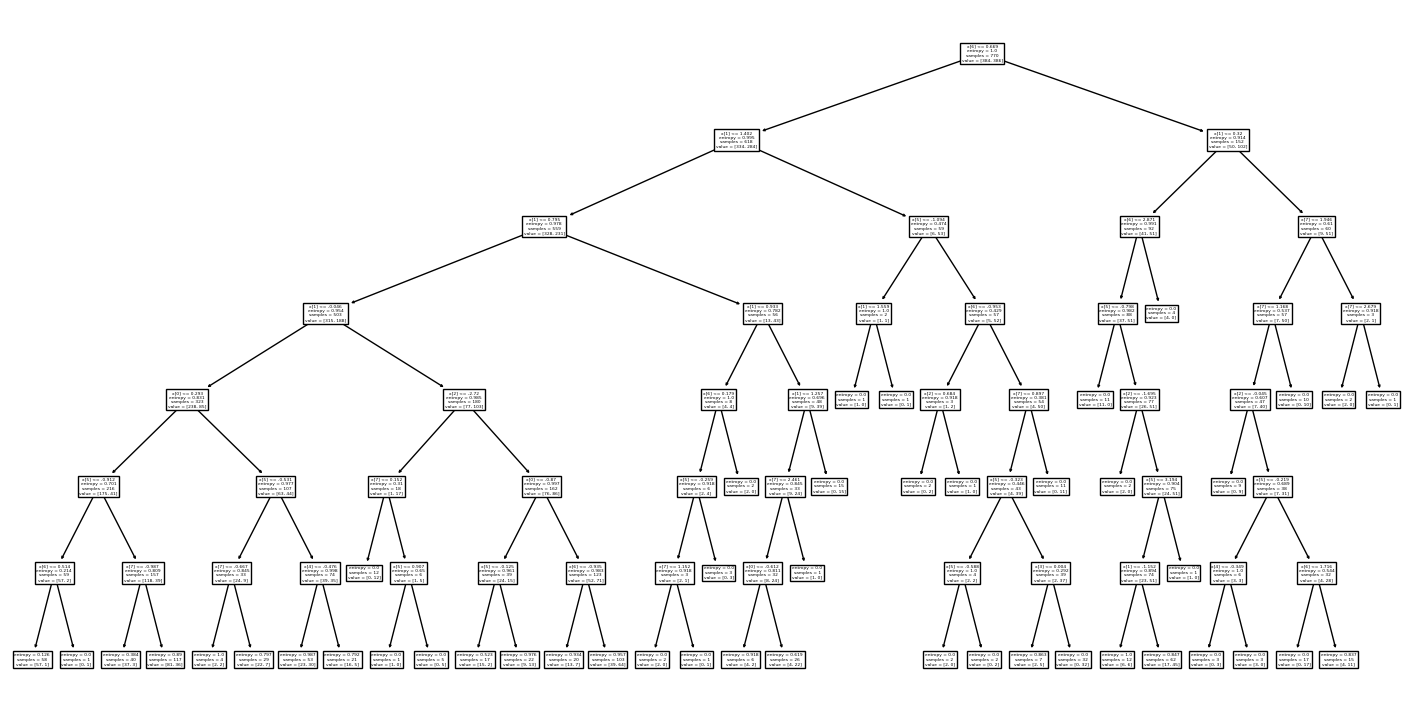

In [38]:
# visualtization of tree with our best params

plt.figure(figsize=(18,9))
clf = DecisionTreeClassifier(criterion='entropy', max_depth=7,splitter='random')
clf.fit(X_train,y_train)
plot_tree(clf)
plt.show()

In [39]:
# addition of more hyperparameter to observe the results

params_dict = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,None],
    'splitter':['random','best'],
    'min_samples_split':[2,3,4,5,10,15,20,30,50]
    }

In [40]:
# Using GridSearchCV for hyperparameter tuining

from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(estimator=clf,param_grid=params_dict,cv=10)

In [41]:
gsc.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                              splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 30, 50],
                         'splitter': ['random', 'best']})

In [42]:
gsc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_split': 50,
 'splitter': 'best'}

In [43]:
gsc.best_score_

0.7415584415584415

Not much progress in training accuracy

In [44]:
y_pred = gsc.predict(X_test)
print('Test Accuracy: ',accuracy_score(y_test,y_pred))

Test Accuracy:  0.8217391304347826


Got less than previous test accuracy

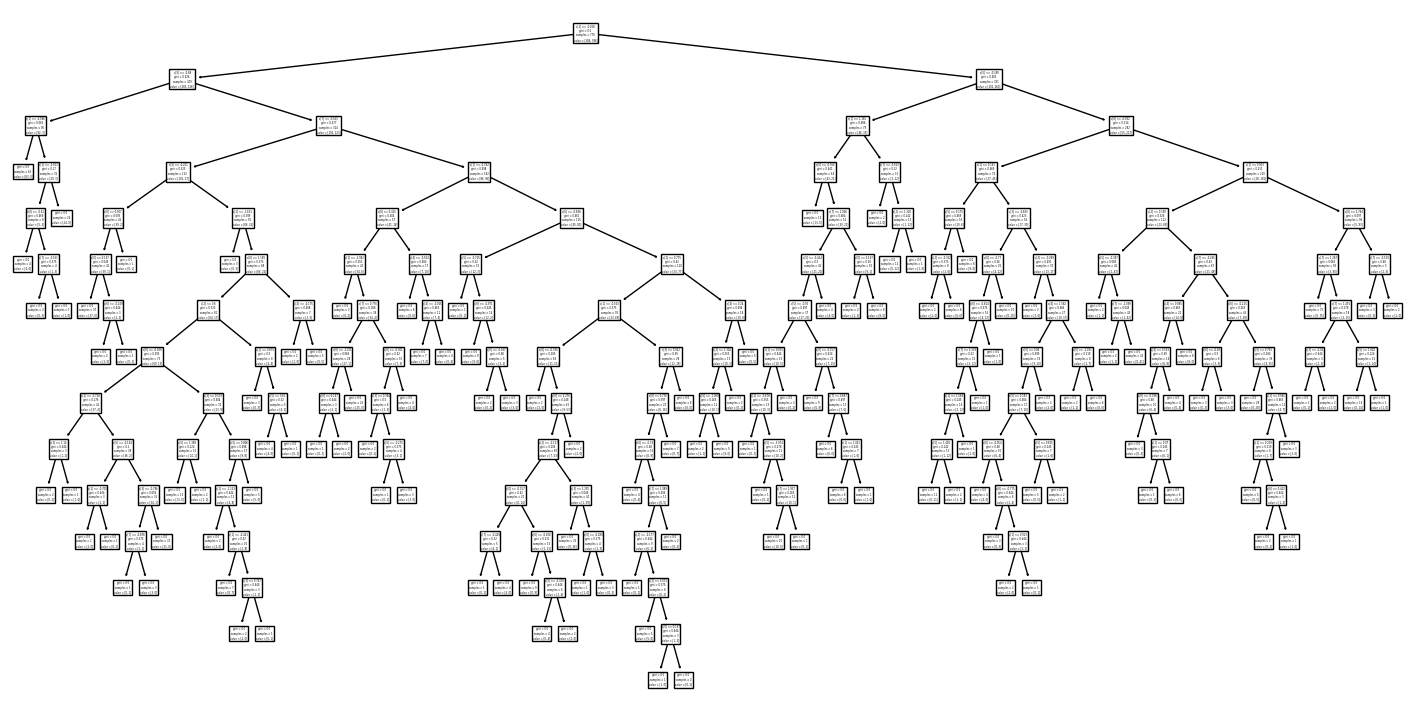

In [45]:
# visualtization of tree with our best params

plt.figure(figsize=(18,9))
clf = DecisionTreeClassifier(criterion='gini', max_depth=None,splitter='best',min_samples_split=3)
clf.fit(X_train,y_train)
plot_tree(clf)
plt.show()

In [46]:
# addition of more hyperparameter to observe the results

params_dict = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,None],
    'splitter':['random','best'],
    'min_samples_split':[2,3,4,5,10,15,20,30,50],
    'min_samples_leaf':[2,3,4,5,10,15,20,30,50,100]
    }

In [47]:
# Using GridSearchCV for hyperparameter tuining

from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(estimator=clf,param_grid=params_dict,cv=10)

In [48]:
gsc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(min_samples_split=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'min_samples_leaf': [2, 3, 4, 5, 10, 15, 20, 30, 50,
                                              100],
                         'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 30, 50],
                         'splitter': ['random', 'best']})

In [49]:
gsc.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'splitter': 'random'}

In [50]:
gsc.best_score_

0.7532467532467533

In [51]:
y_pred = gsc.predict(X_test)
print('Test Accuracy: ',accuracy_score(y_test,y_pred))

Test Accuracy:  0.8


Imporved Accuracy

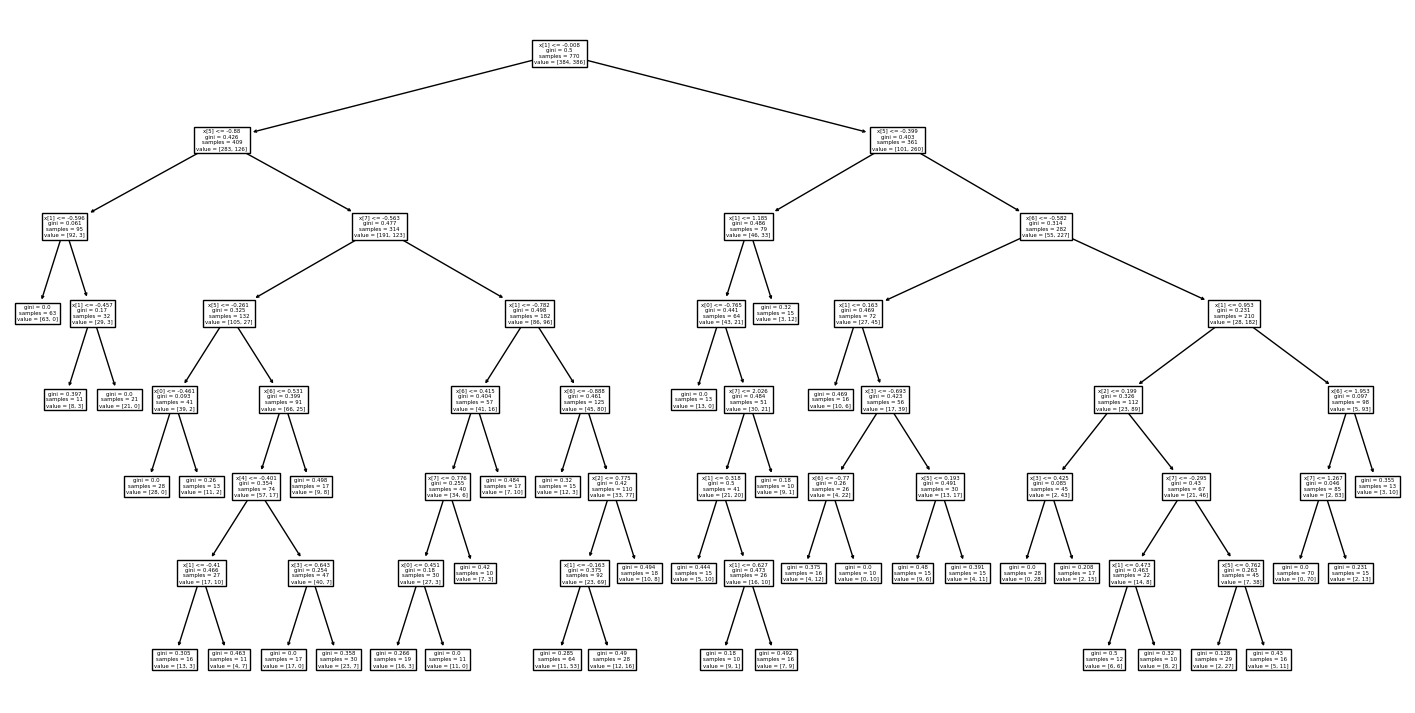

In [52]:
# visualtization of tree with our best params

plt.figure(figsize=(18,9))
clf = DecisionTreeClassifier(criterion='gini', max_depth=7,splitter='best',min_samples_split=5,min_samples_leaf=10)
clf.fit(X_train,y_train)
plot_tree(clf)
plt.show()

In [54]:
# addition of more hyperparameter to observe the results

params_dict = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,None],
    'splitter':['random','best'],
    'min_samples_split':[2,3,4,5,10,15,20,30,50],
    'min_samples_leaf':[2,3,4,5,10,15,20,30,50,100],
    'max_leaf_nodes':[2,3,4,5,7,9,10,15,16,20]
    }

In [55]:
# Using GridSearchCV for hyperparameter tuining

from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(estimator=clf,param_grid=params_dict,cv=10)

In [56]:
gsc.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=7, min_samples_leaf=10,
                                              min_samples_split=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'max_leaf_nodes': [2, 3, 4, 5, 7, 9, 10, 15, 16, 20],
                         'min_samples_leaf': [2, 3, 4, 5, 10, 15, 20, 30, 50,
                                              100],
                         'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 30, 50],
                         'splitter': ['random', 'best']})

In [57]:
gsc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 20,
 'splitter': 'random'}

In [58]:
gsc.best_score_

0.751948051948052

In [59]:
y_pred = gsc.predict(X_test)
print('Test Accuracy: ',accuracy_score(y_test,y_pred))

Test Accuracy:  0.7956521739130434


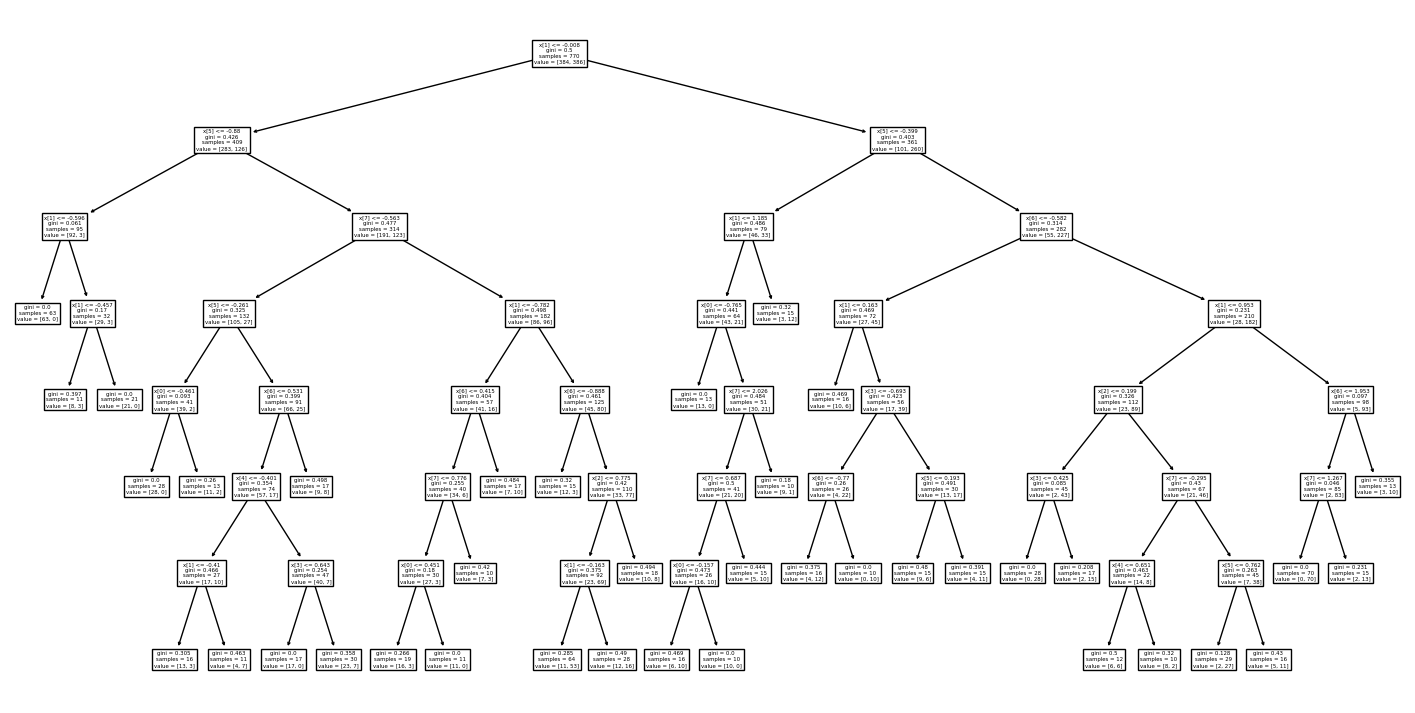

In [60]:
# visualtization of tree with our best params

plt.figure(figsize=(18,9))
clf = DecisionTreeClassifier(criterion='gini', max_depth=7,splitter='best',min_samples_split=5,min_samples_leaf=10)
clf.fit(X_train,y_train)
plot_tree(clf)
plt.show()

In [61]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer, Normalizer, MinMaxScaler

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: >]


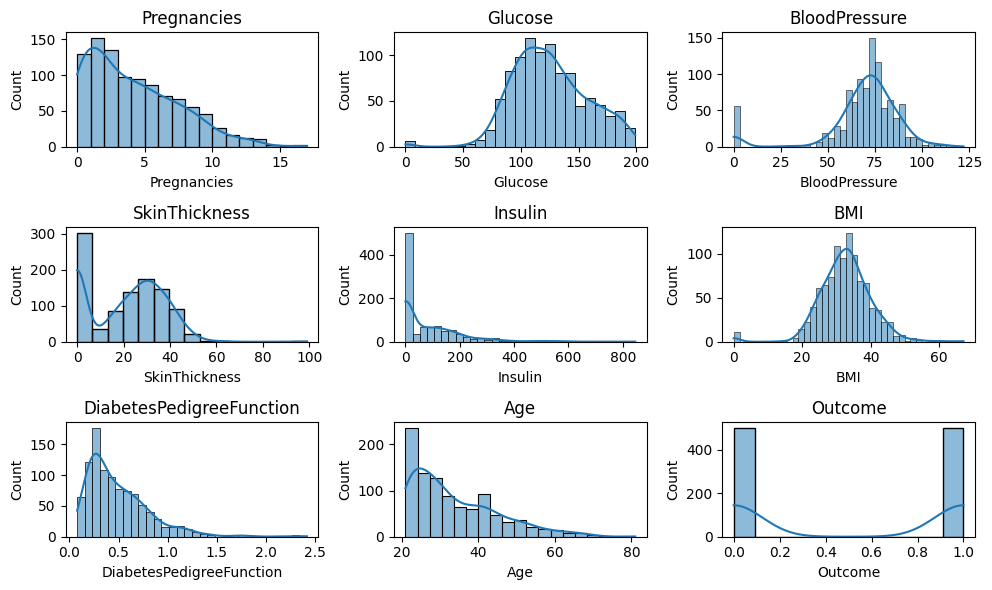

In [63]:
# visualization of the distribution of dataset

no_columns = len(df.columns)

fig, axs = plt.subplots(3,3,figsize=(10,6))

axis = axs.ravel()
print(axis)

for i, column in enumerate(df.columns):
  sns.histplot(x=df[column],kde=True,ax=axis[i])
  axis[i].set_title(f"{column}")

plt.tight_layout()
plt.show()

In [69]:
X_train_df = pd.DataFrame(X_train,columns=df.columns[0:-1])
X_train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.309227,-0.271039,0.223836,-0.382165,0.184748,-0.900608,-1.186077,-0.875846
1,-1.221507,0.100754,-0.076869,-0.133681,0.826542,-0.322994,2.654485,-0.786545
2,0.603052,1.804808,1.226186,-1.313978,-0.713764,1.093535,2.863861,0.999476
3,0.907146,-0.271039,0.524541,0.301165,-0.713764,-0.670879,1.507886,1.356681
4,0.298959,-2.501800,-0.377573,-1.313978,-0.713764,-1.079393,0.249647,0.195767


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (770). n_quantiles is set to n_samples.
  warnings.warn(


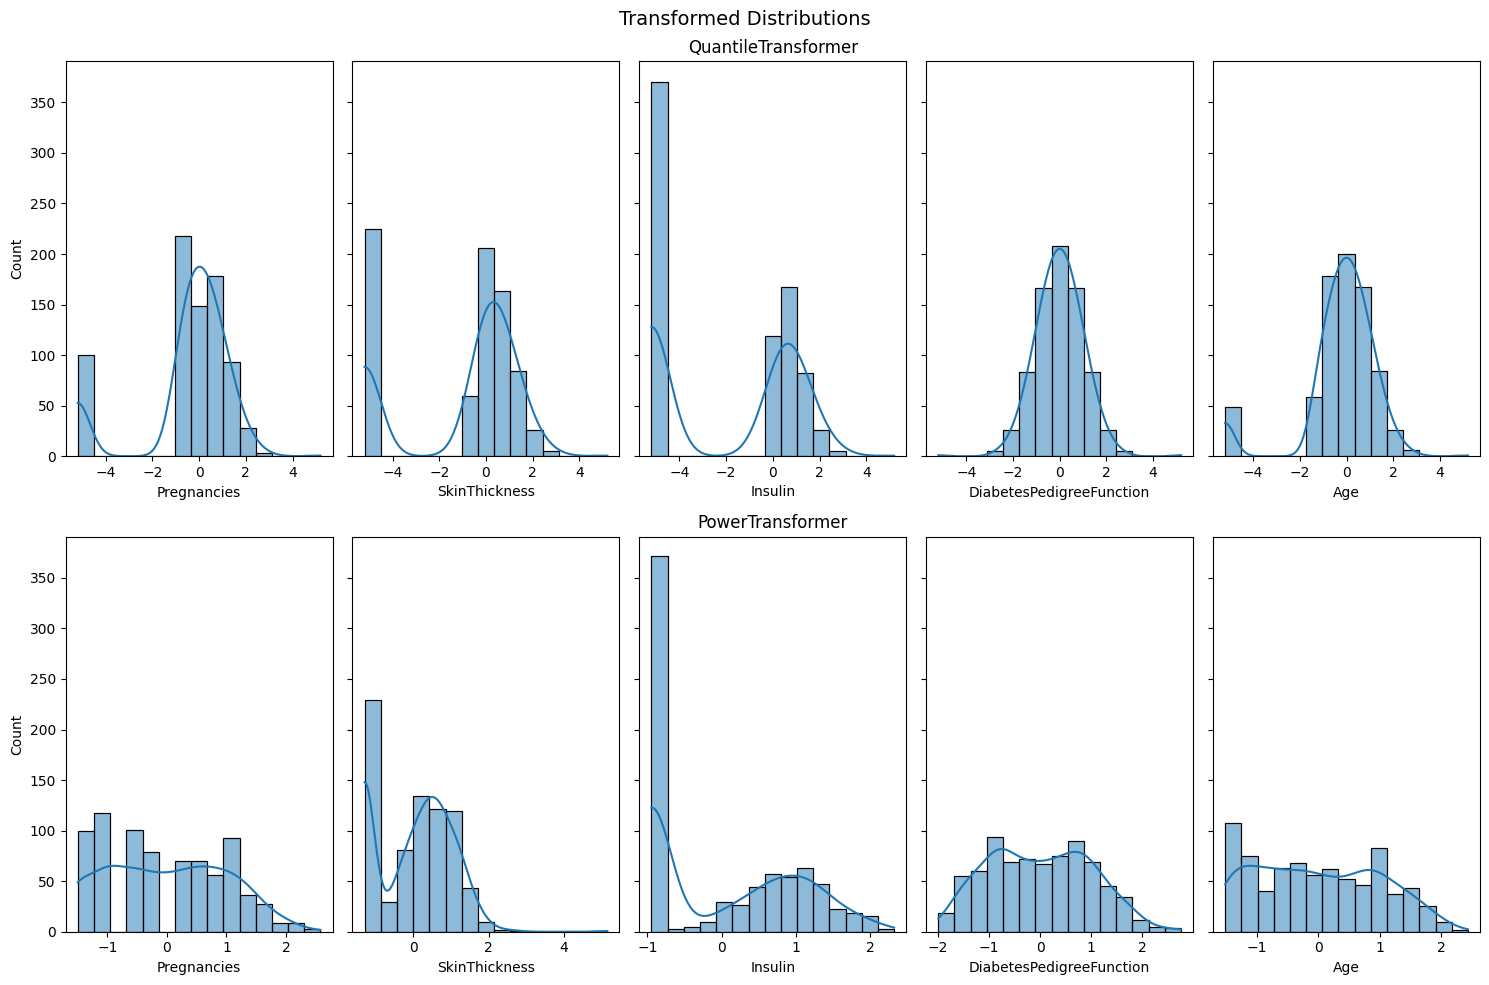

In [76]:
transformers = [
    QuantileTransformer(output_distribution='normal',random_state=0),
    PowerTransformer(standardize=True)
]

fig, axs = plt.subplots(2,5, figsize=[15,10],sharey=True)

fig.suptitle("Transformed Distributions",fontsize=14)

for i, t in enumerate(transformers):

  X_train_transformed = t.fit_transform(X_train_df[['Pregnancies','SkinThickness','Insulin','DiabetesPedigreeFunction','Age']])
  df_transformed = pd.DataFrame(X_train_transformed, columns=['Pregnancies','SkinThickness','Insulin','DiabetesPedigreeFunction','Age'])

  sns.histplot(x=df_transformed['Pregnancies'],kde=True,ax=axs[i,0],bins=15)
  axs[i,0].set_xlabel('Pregnancies')

  sns.histplot(x=df_transformed['SkinThickness'],kde=True,ax=axs[i,1],bins=15)
  axs[i,1].set_xlabel('SkinThickness')

  sns.histplot(x=df_transformed['Insulin'],kde=True,ax=axs[i,2],bins=15)
  axs[i,2].set_xlabel('Insulin')
  axs[i,2].set_title(type(t).__name__)

  sns.histplot(x=df_transformed['DiabetesPedigreeFunction'],kde=True,ax=axs[i,3],bins=15)
  axs[i,3].set_xlabel('DiabetesPedigreeFunction')

  sns.histplot(x=df_transformed['Age'],kde=True,ax=axs[i,4],bins=15)
  axs[i,4].set_xlabel('Age')


plt.tight_layout()
plt.show()

In [87]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
# Seperate Dependent and Independent Variable

X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [89]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.23)


In [96]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [99]:
X_train = pd.DataFrame(X_train,columns=df.columns[0:-1])
X_test = pd.DataFrame(X_test,columns=df.columns[0:-1])

In [100]:
# Define preprocessor using columnTransfer

perprocessor = ColumnTransformer(
    transformers=[
        ('quantile',QuantileTransformer(output_distribution='normal'),['Pregnancies','SkinThickness','Insulin','DiabetesPedigreeFunction','Age'])
    ],
    remainder='passthrough'
)

# Define the pipeline for Decision Tree Classifier

pipeline_clf = Pipeline(
    steps=[
        ('preprocessor',perprocessor),
        ('classifier',DecisionTreeClassifier())
    ]
)

best_params={'classifier__criterion': ['entropy'],
 'classifier__max_depth': [7],
 'classifier__max_leaf_nodes': [15],
 'classifier__min_samples_leaf': [3],
 'classifier__min_samples_split': [20],
 'classifier__splitter': ['random']}


grid_search = GridSearchCV(pipeline_clf,param_grid=best_params,cv=10)
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (693). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (693). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (693). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (693). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (693). 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('quantile',
                                                                         QuantileTransformer(output_distribution='normal'),
                                                                         ['Pregnancies',
                                                                          'SkinThickness',
                                                                          'Insulin',
                                                                          'DiabetesPedigreeFunction',
                                                                          'Age'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__criterion': ['entropy'],
                         'classifier__max_depth': [7],
                         'classifier__max_leaf_nodes': [15],
                         'classifier__min_samples_leaf': [3],
                         'classifier__min_samples_split': [20],
                         'classifier__splitter': ['random']})

In [101]:
print("Accuracy Score: ",grid_search.best_score_)

Accuracy Score:  0.6831168831168831


In [102]:
y_pred = grid_search.predict(X_test)

In [103]:
print("Test Accuracy Score: ",accuracy_score(y_test,y_pred))

Test Accuracy Score:  0.7608695652173914
